<a href="https://colab.research.google.com/github/jha-amit/m2pi.ca/blob/master/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')
%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
pip install opencv-python


In [ ]:
# import os
# from PIL import Image
# #C:\Users\Amit\Documents\Math_industry\Crack_detection\Data\OneDrive_2021-08-16\Parking Lot
# path = 'C:/Users/Amit/Documents/Math_industry/Crack_detection/Data/OneDrive_2021_08_16/Parking_Lot'
# print(path)
# for root, dirs, files in os.walk(path, topdown=False):
#     for name in files:
#         print(os.path.join(root,name))
#         if os.path.splitext(os.path.join(root, name))[1]== ".tif":
#             print(1)
#             outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
#             im = Image.open(os.path.join(root,name))
#             print ("Generating jpeg for %s" % name)
#             # im.thumbnail(im.size)
#             im.save(outfile, "JPEG")

/content\Data\OneDrive_2021-08-16\Parking Lot


In [2]:
# convert images from tif to jpeg
import os
from pathlib import Path
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import cv2
from skimage.exposure import rescale_intensity
import argparse
from google.colab.patches import cv2_imshow

from tifffile import imread

In [3]:
def convolve(image,kernel):
#grab the spatial dimensions of the image, along with
# the spatial dimensions of the kernel
    (iH,iW)=image.shape[:2]
    (kH,kW)=kernel.shape[:2]
    print(kH,kW)
  # Introducing padding for filter sliding. The last rows and columns would be fixed.
    pad=(kW-1)//2
    image=cv2.copyMakeBorder(image,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    output=np.zeros((iH,iW),dtype="float32") 
    for y in np.arange(pad,iH+pad):
        for x in np.arange(pad,iW+pad):
            roi=image[y-pad:y+pad+1,x-pad:x+pad+1]
            k=(roi*kernel).sum()
            output[y-pad,x-pad]=k
            output=rescale_intensity(output,in_range=(0,255))
            output=(output*255).astype("uint8")
            return output

In [ ]:

smallBlur=np.ones((7,7),dtype='float')*(1/(7*7))
largeBlur=np.ones((21,21),dtype='float')*(1/(21*21))
sharpen=np.array(([0,-1,0],[-1,5,-1],[0,-1,0]),dtype="int")
#new_image_x=convolve(image,filter,verbose)
laplacian=np.array(([0,1,0],[1,-4,1],[0,1,0]),dtype="int")
sobelX=np.array(([-1,0,1],[-2,0,2],[-1,0,1]),dtype="int")
sobelY=np.array(([-1,-2,-1],[0,0,0],[1,2,1]),dtype="int")
kernelBank=(("small_blur",smallBlur),("larg_blur",largeBlur),("sharpen",sharpen),
            ("laplacian",laplacian),("sobel_x",sobelX),("sobel_y",sobelY))
    
                   

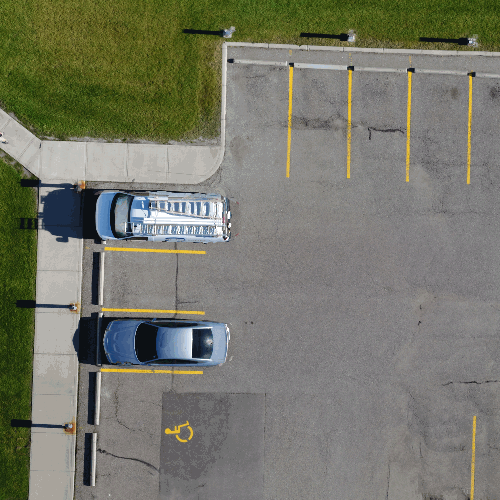

Current image size is: (500, 500, 3)
(500, 500, 3)


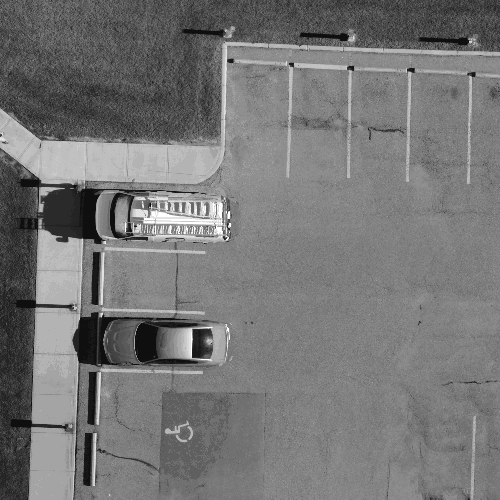

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [91]:
image=cv2.imread("Lot1.tif")
image = cv2.resize(image, (500, 500))
cv2_imshow(image)
print(f"Current image size is: {image.shape}")
print(image.shape) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
image2_log = (np.log(gray+1)/(np.log(1+np.max(gray))))*255
image2_log = image2_log.astype(np.uint8)
bilateral = cv2.bilateralFilter(image2_log, 4, 100, 100)

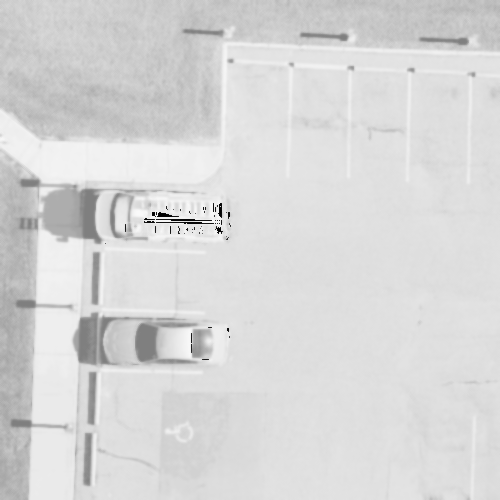

In [92]:
cv2_imshow(bilateral)

In [93]:
sobelX=np.array(([-1,0,1],[-2,0,2],[-1,0,1]),dtype="int")
sobelY=np.array(([-1,-2,-1],[0,0,0],[1,2,1]),dtype="int")


3 3


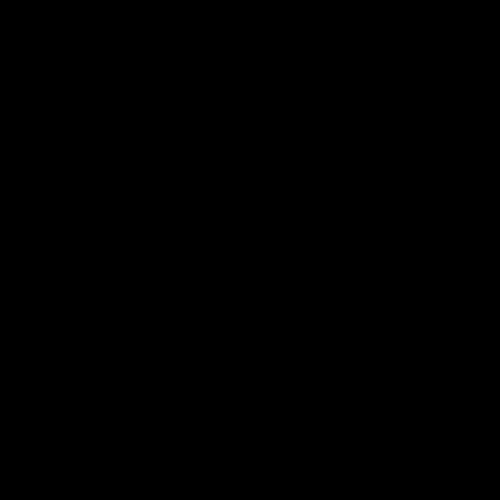

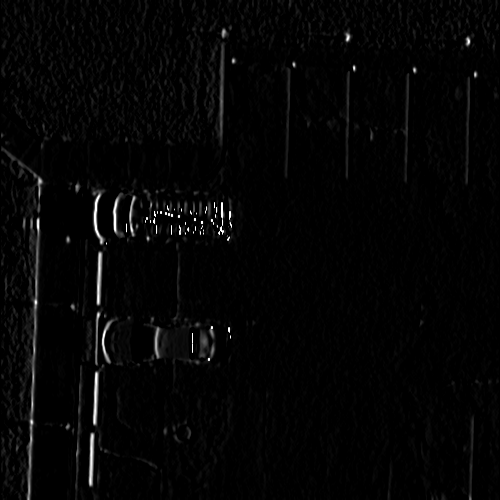

In [81]:
#convolve with sobel kernel in x direction (x derivative)
convoleOutput=convolve(bilateral,sobelX)
opencvOutput=cv2.filter2D(bilateral,-1,sobelX)
cv2_imshow(convoleOutput)
cv2_imshow(opencvOutput)
# for (kernelName,kernel) in kernelBank:
    
#     #cv2_imshow(gray)
#     cv2_imshow(convoleOutput)
#     cv2_imshow(opencvOutput)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

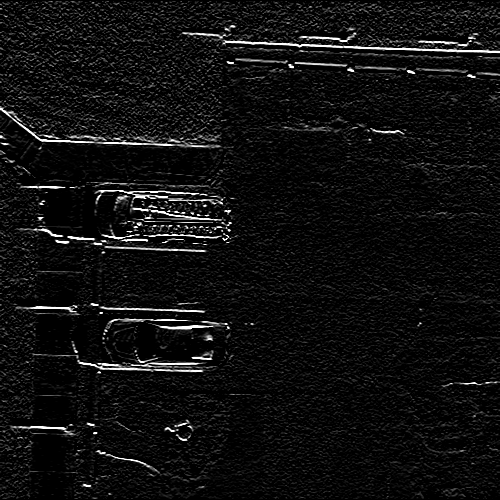

In [96]:
# y derivative
opencvOutputY=cv2.filter2D(gray,-1,sobelY)
cv2_imshow(opencvOutputY)

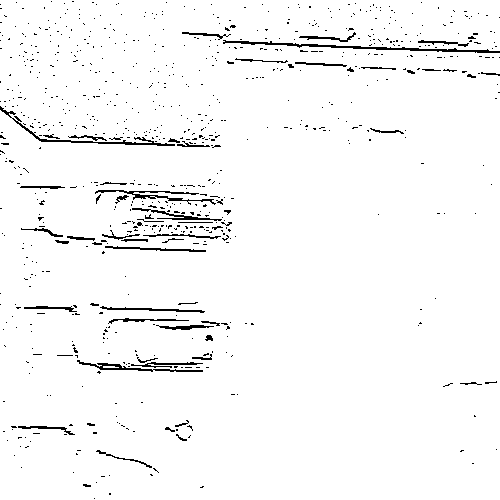

[INFO] otsu's thresholding value: 99.0


In [97]:
# apply thresholding
(T, threshInv) = cv2.threshold(opencvOutputY, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))

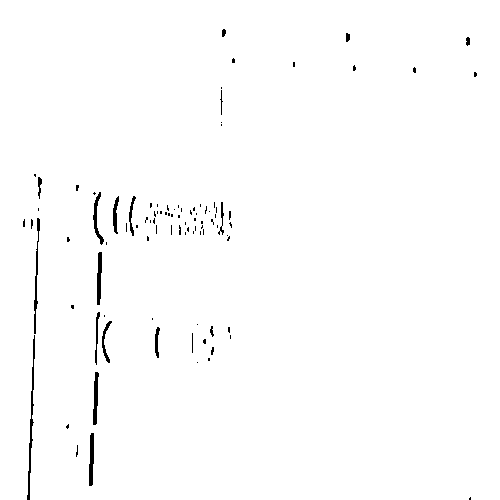

[INFO] otsu's thresholding value: 79.0


In [53]:

(T, threshInvx) = cv2.threshold(opencvOutput, 255, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))


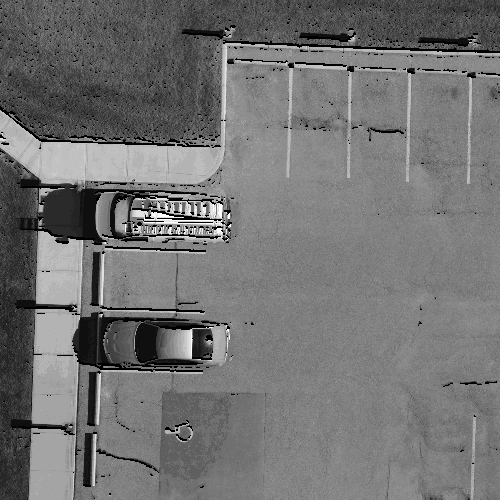

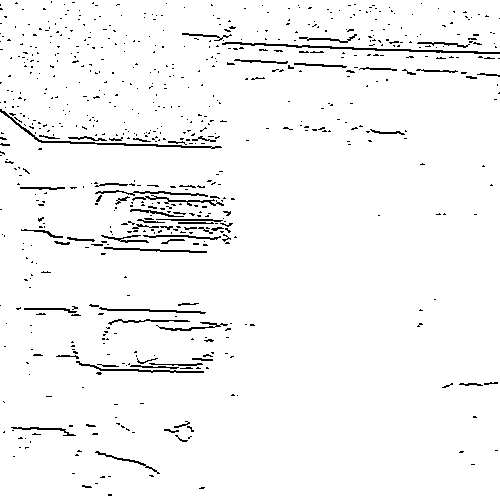

[INFO] otsu's thresholding value: 119.0


In [98]:
# visualize only the masked regions in the image
laplacian=np.array(([0,1,0],[1,-4,1],[0,1,0]),dtype="int")
masked = cv2.bitwise_and(gray, gray, mask=threshInv)
cv2_imshow(masked)
cv2.waitKey(0)
opencvOutputY=cv2.filter2D(masked,-1,sobelY)
opencvOutput_lap=cv2.filter2D(masked,-1,laplacian)
(T, threshInv) = cv2.threshold(opencvOutputY, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)
print("[INFO] otsu's thresholding value: {}".format(T))


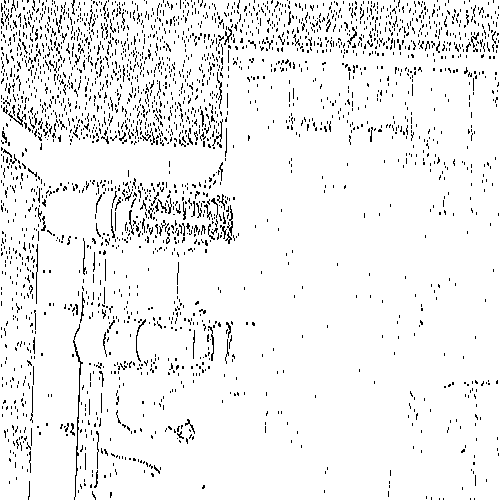

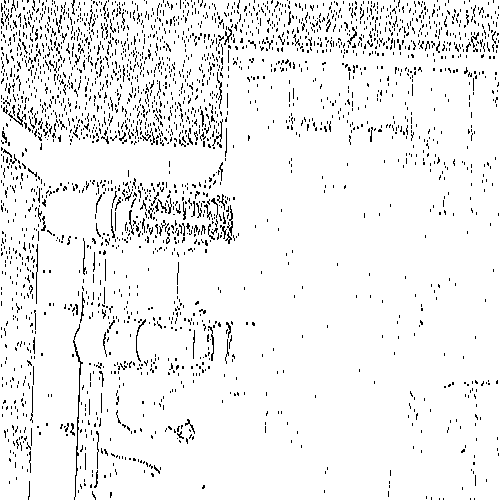

In [100]:
opencvOutputx=cv2.filter2D(threshInv,-1,sobelX)
(T, threshInv) = cv2.threshold(opencvOutputx, 0, 255,
cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)
cv2_imshow(threshInv)